In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../artifacts/Food_Reviews_new.csv")

In [3]:
data.head()

,Score,Type,Label,Text,Summary
0,5,good,1,I can't believe I am the first to review this ...,A Great Product!!!
1,5,good,1,You can find this 6-pack for $40 dollars less ...,BUY ELSEWHERE
2,5,good,1,Our 9 month old originally was spitting up a l...,Best Organic milk out there..my baby switched ...
3,5,good,1,"When my daughter was an infant, she was allerg...",We are a fan
4,5,good,1,"I love pasta, but it does not love me. I just...",Absolutely awesome!


## Data Preprocessing

In [4]:
data.shape

(9999, 5)

In [10]:
data.duplicated().sum()

551

In [12]:
data = data.drop_duplicates()

In [14]:
data.duplicated().sum()

0

In [15]:
data.isnull().sum()

Score      0
Type       0
Label      0
Text       0
Summary    0
dtype: int64

In [17]:
data.shape

(9448, 5)

## Text Preprocessing

In [18]:
import re
import string

In [19]:
data["Summary"].head(5)

0                                   A Great Product!!!
1                                        BUY ELSEWHERE
2    Best Organic milk out there..my baby switched ...
3                                         We are a fan
4                                  Absolutely awesome!
Name: Summary, dtype: object

convert uppercase to lowercase

In [33]:
data_new = pd.DataFrame(data)

In [34]:
data_new.head()

,Score,Type,Label,Text,Summary
0,5,good,1,I can't believe I am the first to review this ...,agreatproduct!!!
1,5,good,1,You can find this 6-pack for $40 dollars less ...,buyelsewhere
2,5,good,1,Our 9 month old originally was spitting up a l...,bestorganicmilkoutthere..mybabyswitchedfromsim...
3,5,good,1,"When my daughter was an infant, she was allerg...",weareafan
4,5,good,1,"I love pasta, but it does not love me. I just...",absolutelyawesome!


In [35]:
data_new["Summary"] = data_new["Summary"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [36]:
data_new.head()

,Score,Type,Label,Text,Summary
0,5,good,1,I can't believe I am the first to review this ...,agreatproduct!!!
1,5,good,1,You can find this 6-pack for $40 dollars less ...,buyelsewhere
2,5,good,1,Our 9 month old originally was spitting up a l...,bestorganicmilkoutthere..mybabyswitchedfromsim...
3,5,good,1,"When my daughter was an infant, she was allerg...",weareafan
4,5,good,1,"I love pasta, but it does not love me. I just...",absolutelyawesome!


In [26]:
data["Summary"]=data["Summary"].apply(lambda x: " ".join(x.lower() for x in x.split()))

C:\Users\Bimali\AppData\Local\Temp\ipykernel_17948\4249913504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Summary"]=data["Summary"].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [27]:
data.loc[:, "Summary"] = data["Summary"].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [31]:
data["Summary"].head(5)

0                                     agreatproduct!!!
1                                         buyelsewhere
2    bestorganicmilkoutthere..mybabyswitchedfromsim...
3                                            weareafan
4                                   absolutelyawesome!
Name: Summary, dtype: object

In [42]:
data.loc[ :,"Text"] = data["Text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [43]:
data["Text"].head()

0    i can't believe i am the first to review this ...
1    you can find this 6-pack for $40 dollars less ...
2    our 9 month old originally was spitting up a l...
3    when my daughter was an infant, she was allerg...
4    i love pasta, but it does not love me. i just ...
Name: Text, dtype: object

Remove links...

In [49]:
data["Text"]=data["Text"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x,flags=re.MULTILINE) for x in x.split()))

In [51]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["Text"]=data["Text"].apply(remove_punctuations)

In [53]:
data["Text"].head(5)

0    i cant believe i am the first to review this g...
1    you can find this 6pack for 40 dollars less at...
2    our 9 month old originally was spitting up a l...
3    when my daughter was an infant she was allergi...
4    i love pasta but it does not love me i just do...
Name: Text, dtype: object

Remove Numbers

In [55]:
data["Text"]=data['Text'].str.replace('\d+', '',regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Bimali\AppData\Local\Temp\ipykernel_17948\29170371.py:1: SyntaxWarning: invalid escape sequence '\d'
  data["Text"]=data['Text'].str.replace('\d+', '',regex=True)


In [57]:
data["Text"] = data['Text'].str.replace(r'\d+', '', regex=True)

In [58]:
data["Text"].head(5)

0    i cant believe i am the first to review this g...
1    you can find this pack for  dollars less at di...
2    our  month old originally was spitting up a lo...
3    when my daughter was an infant she was allergi...
4    i love pasta but it does not love me i just do...
Name: Text, dtype: object

Remove stopwords

In [60]:
!pip install nltk

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
      --------------------------------------- 0.0/1.5 MB 435.7 kB/s eta 0:00:04
     - -------------------------------------- 0.0/1.5 MB 279.3 kB/s eta 0:00:06
     - -------------------------------------- 0.0/1.5 MB 279.3 kB/s eta 0:00:06
     - -------------------------------------- 0.0/1.5 MB 279.3 kB/s eta 0:00:06
     - -------------------------------------- 0.1/1.5 MB 251.0 kB/s eta 0:00:06
     -- ------------------------------------- 0.1/1.5 MB 269.5 kB/s eta 0:00:06
     -- ------------------------------------- 0.1/1.5 MB 311.2 kB/s eta 0:00:05
     --- ------------------------------------ 0.1/1.5 MB 340.5 kB/s eta 0:00:05
     

In [61]:
import nltk

In [62]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [64]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw=file.read().splitlines()

In [65]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [66]:
data["Text"]=data["Text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [67]:
data["Text"].head(5)

0    cant believe first review great productbr br u...
1    find pack dollars less diaperscom reason charg...
2    month old originally spitting lot st similac r...
3    daughter infant allergic something breastmilk ...
4    love pasta love dont seem able digest pasta ta...
Name: Text, dtype: object

Stemming

In [68]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [69]:
data["Text"]=data["Text"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [70]:
data["Text"].head(5)

0    cant believ first review great productbr br us...
1    find pack dollar less diaperscom reason charg ...
2    month old origin spit lot st similac regular w...
3    daughter infant allerg someth breastmilk put n...
4    love pasta love dont seem abl digest pasta tas...
Name: Text, dtype: object

In [71]:
data

,Score,Type,Label,Text,Summary
0,5,good,1,cant believ first review great productbr br us...,agreatproduct!!!
1,5,good,1,find pack dollar less diaperscom reason charg ...,buyelsewhere
2,5,good,1,month old origin spit lot st similac regular w...,bestorganicmilkoutthere..mybabyswitchedfromsim...
3,5,good,1,daughter infant allerg someth breastmilk put n...,weareafan
4,5,good,1,love pasta love dont seem abl digest pasta tas...,absolutelyawesome!
...,...,...,...,...,...
9994,5,good,1,final high fiber cereal tast great like mix ca...,awesome!!!
9995,3,bad,0,cereal make get fiber easier tast good product...,myleastfavoriteofthefiberoneoptions
9996,5,good,1,love love love cereal tast like caramel versio...,thebestfibercereali'veevereaten!
9997,5,good,1,decid give tri fiber bar good well disappoint ...,my3yearoldlovesit!


## Building Vacabulary

In [73]:
from collections import Counter
vocab = Counter()

In [74]:
vocab

Counter()

In [75]:
for sentence in data["Text"]:
    vocab.update(sentence.split())

In [76]:
vocab

Counter({'like': 4558,
         'br': 4373,
         'tast': 4333,
         'flavor': 3545,
         'good': 3358,
         'coffe': 3165,
         'one': 2914,
         'use': 2849,
         'product': 2848,
         'tri': 2835,
         'love': 2797,
         'great': 2706,
         'make': 2192,
         'would': 2069,
         'get': 1998,
         'food': 1901,
         'tea': 1852,
         'buy': 1770,
         'realli': 1665,
         'time': 1629,
         'much': 1544,
         'dont': 1526,
         'drink': 1514,
         'order': 1498,
         'eat': 1495,
         'price': 1421,
         'bag': 1393,
         'littl': 1380,
         'also': 1365,
         'cup': 1353,
         'find': 1326,
         'best': 1325,
         'mix': 1288,
         'better': 1252,
         'well': 1234,
         'amazon': 1209,
         'even': 1182,
         'im': 1173,
         'ive': 1120,
         'store': 1110,
         'water': 1087,
         'chocol': 1074,
         'sugar': 1070,
   

In [77]:
len(vocab)

17842

In [78]:
data.shape

(9448, 5)

Fixed overfitting

In [79]:
vocab_tokens = [key for key in vocab if vocab[key] > 10]

In [81]:
vocab_tokens

['cant',
 'believ',
 'first',
 'review',
 'great',
 'productbr',
 'br',
 'use',
 'best',
 'organ',
 'infant',
 'formula',
 'iron',
 'ounc',
 'also',
 'product',
 'littl',
 'start',
 'show',
 'sign',
 'lactos',
 'intoler',
 'pediatrician',
 'search',
 'soy',
 'offer',
 'free',
 'altern',
 'mani',
 'prefer',
 'want',
 'natur',
 'nasti',
 'chemic',
 'ingredi',
 'consider',
 'amount',
 'research',
 'shop',
 'around',
 'found',
 'choic',
 'market',
 'one',
 'took',
 'well',
 'lot',
 'better',
 'find',
 'pack',
 'dollar',
 'less',
 'reason',
 'charg',
 'much',
 'month',
 'old',
 'origin',
 'spit',
 'st',
 'similac',
 'regular',
 'went',
 'sensit',
 'final',
 'trick',
 'past',
 'recal',
 'wife',
 'becam',
 'disgust',
 'suggest',
 'tri',
 'new',
 'brand',
 'anyway',
 'remind',
 'babi',
 'get',
 'older',
 'becom',
 'fussi',
 'mayb',
 'dont',
 'need',
 'anymor',
 'that',
 'local',
 'whole',
 'food',
 'store',
 'bought',
 'instant',
 'hit',
 'son',
 'love',
 'serious',
 'gobbl',
 'oz',
 'shot',
 

In [82]:
len(vocab_tokens)

2893

Save the new vocab

In [83]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(vocab_tokens, '../static/model/vocabulary.txt')

## Divide dataset

In [87]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 163.8 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.4 kB 163.8 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 174.3 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 174.3 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 174.3 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 128.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ----------------

In [92]:
x=data['Text']
y=data['Label']

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [94]:
x_train.shape

(7558,)

In [96]:
x_test.shape

(1890,)

In [97]:
y_train.shape

(7558,)

In [98]:
y_test.shape

(1890,)

In [99]:
y_test

5242    1
6775    0
5489    1
5896    1
5540    0
       ..
7108    1
1247    1
2663    1
4218    1
5636    0
Name: Label, Length: 1890, dtype: int64

In [100]:
y_train

4548    1
3465    0
5220    0
3068    1
5351    0
       ..
1639    1
9698    1
6280    1
6430    0
8698    1
Name: Label, Length: 7558, dtype: int64

In [101]:
x_test

5242    usual cring littl natur juicecarbon beverag fr...
6775    use less month cat fur began fall badbr stop u...
5489    ship great shape gave son one use reg coffe re...
5896    ever make french potato stickskeep best french...
5540    product advertis good way util coffe blend eas...
                              ...                        
7108    love coffe bitter lot good coffe tast one fit ...
1247    get get get popcorn truli tender delici popcor...
2663    search mani local store find product order via...
4218    cat tigger eat stuff fast ask figur must good ...
5636    cup littl tight machin press handl realli hard...
Name: Text, Length: 1890, dtype: object

In [102]:
x_train

4548    youv never tri ghirardelli hot cocoa product t...
3465    guess job okay much cheaper hour brand packag ...
5220    look forward tast switch orang tangerin drink ...
3068    melitta cafe collect gourmet coffe wonder tast...
5351    drink juic concentr reconstitut carbon water t...
                              ...                        
1639    extrem satisfi hodgson mill bread mix purchas ...
9698    us cant digest gluten final cooki tast delici ...
6280    great deal amount pretzel pack given love sinc...
6430    compar jay robb say protein good tast isnt goo...
8698    discov year ago pork rind consum make great qu...
Name: Text, Length: 7558, dtype: object

## Vectorization

In [103]:
def vectorizer(ds, vocabulary):
    vectorized_list = []
    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1
        vectorized_list.append(sentence_list)
    vectorized_list_new = np.asarray(vectorized_list, dtype=np.float32)
    return vectorized_list_new
        

In [106]:
vectorized_x_train = vectorizer(x_train,vocab_tokens)

In [107]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [108]:
for i in vectorized_x_train[0]:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [109]:
vectorized_x_test = vectorizer(x_test,vocab_tokens)

In [110]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [111]:
for i in vectorized_x_test[0]:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


Check the balance of dataset

In [112]:
y_train.value_counts()

Label
1    5797
0    1761
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2317f1543e0>,
 [Text(-0.8182339555863429, 0.7351824222092955, 'good'),
  Text(0.8182339900027154, -0.7351823839049986, 'bad')])

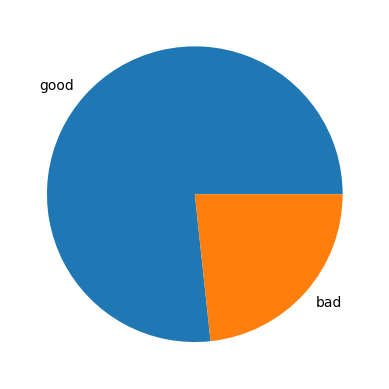

In [115]:
plt.pie(np.array([y_train.value_counts()[1], y_train.value_counts()[0]]), labels=['good', 'bad'])

### Handle imbalanced dataset

In [117]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   ----- --------------------------------- 30.7/235.6 kB 163.8 kB/s eta 0:00:02
   ------ -------------------------------- 41.0/235.6 kB 178.6 kB/s eta 0:00:02
   ------ -------------------------------- 41.0/235.6 kB 178.6 kB/s eta 0:00:02
   ------ -------------------------------- 41.0/235.6 kB 178.6 kB/s eta 0:00:02
   ------ -------------------------------- 41.0/235.6 kB 178.6 kB/s eta 0:00:02
   ------ -------------------------------- 41.0/235.6 kB 178.6 kB/s eta 0:00:02
   ------ -------------------------------- 41.0/235.6 kB 178.6 kB/s eta 0:00:02
   ------ 

In [121]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(11594, 2893) (11594,)


In [122]:
y_train_smote.value_counts()

Label
1    5797
0    5797
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2316caf71d0>,
 [Text(6.735557395310444e-17, 1.1, 'good'),
  Text(-2.0206672185931328e-16, -1.1, 'bad')])

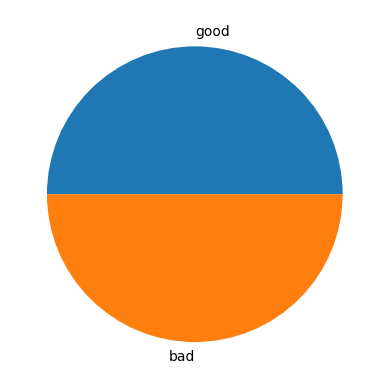

In [120]:
plt.pie(np.array([y_train_smote.value_counts()[1], y_train_smote.value_counts()[0]]), labels=['good', 'bad'])

In [123]:
vectorized_x_train_smote

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.5049757, 0.5049757, ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [124]:
y_train_smote

0        1
1        0
2        0
3        1
4        0
        ..
11589    0
11590    0
11591    0
11592    0
11593    0
Name: Label, Length: 11594, dtype: int64

In [125]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [127]:
y_test

5242    1
6775    0
5489    1
5896    1
5540    0
       ..
7108    1
1247    1
2663    1
4218    1
5636    0
Name: Label, Length: 1890, dtype: int64

## Model Training and Evaluation

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')


### Logistic Regression

In [135]:
lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
lr.fit(vectorized_x_train_smote, y_train_smote)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [136]:
y_train_pred = lr.predict(vectorized_x_train_smote)

In [137]:
y_train_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [138]:
y_train_smote

0        1
1        0
2        0
3        1
4        0
        ..
11589    0
11590    0
11591    0
11592    0
11593    0
Name: Label, Length: 11594, dtype: int64

In [139]:
training_scores(y_train_smote, y_train_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


In [140]:
y_test_pred = lr.predict(vectorized_x_test)

In [141]:
y_test_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [142]:
y_test

5242    1
6775    0
5489    1
5896    1
5540    0
       ..
7108    1
1247    1
2663    1
4218    1
5636    0
Name: Label, Length: 1890, dtype: int64

In [143]:
validation_scores(y_test, y_test_pred)

Testing Scores:
	Accuracy = 0.785
	Precision = 0.864
	Recall = 0.851
	F1-Score = 0.857


### Logistic Regression

In [144]:
lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.785
	Precision = 0.864
	Recall = 0.851
	F1-Score = 0.857


### Multinobial Naive Bayes

In [146]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.894
	Precision = 0.905
	Recall = 0.881
	F1-Score = 0.893
Testing Scores:
	Accuracy = 0.826
	Precision = 0.9
	Recall = 0.868
	F1-Score = 0.884


### Decision Tree

In [147]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.741
	Precision = 0.818
	Recall = 0.846
	F1-Score = 0.832


### Random Forest

In [148]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.791
	Precision = 0.79
	Recall = 0.987
	F1-Score = 0.878


### Support Vector Machine

In [150]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.989
	Precision = 0.991
	Recall = 0.987
	F1-Score = 0.989
Testing Scores:
	Accuracy = 0.823
	Precision = 0.847
	Recall = 0.936
	F1-Score = 0.889


In [151]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)